In [4]:
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [ ]:
def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    args.lr = args.original_lr
    
    for i in range(len(args.steps)):
        scale = args.scales[i] if i < len(args.scales) else 1
        if epoch >= args.steps[i]:
            args.lr = args.lr * scale
            if epoch == args.steps[i]:
                break
        else:
            break
    for param_group in optimizer.param_groups:
        param_group['lr'] = args.lr

In [ ]:
def validate():
    mae = 0
    for i,(img, target) in enumerate(test_loader):
        img = img.cuda()
        img = Variable(img)
        output = model(img)        
        mae += abs(output.data.sum()-target.sum().type(torch.FloatTensor).cuda())
        
    mae = mae/len(test_loader)
    print(' * MAE {mae:.3f}'.format(mae=mae))
    return mae

In [10]:
num_epochs = 100

for epoch in range(num_epochs):
    #print('Epoch {}/{}'.format(epoch, num_epochs-1))
    #print('-' * 20)
    
    adjust_learning_rate(optimizer, epoch)
    
    train()
    
    prec1 = validate()
    
    #is_best = prec1 < best_prec1
    best_prec1 = min(prec1, best_prec1)
    print(' * best MAE {mae:.3f} '.format(mae=best_prec1))

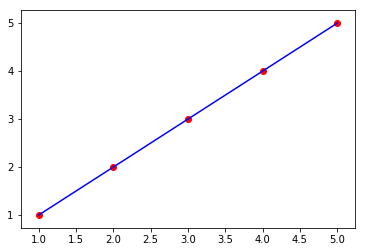

In [11]:
test_counter = [1,2,3,4,5]
test_losses = [1,2,3,4,5]

train_counter = [1,2,3,4,5]
train_losses = [1,2,3,4,5]

plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.show()